In [1]:
import sys
import os
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

sns.set(palette = 'muted', style = 'darkgrid')

In [2]:
mod_path = '/Users/ishareef7/Springboard/Capstone2'
sys.path.append(mod_path)
from src.features import build_dataset

In [3]:
def plot_spect(spect, figsize = (10,5), title = None):
    """Take numerical array representation of spectrogram and display the Mel Spectrogram"""
    fig = plt.figure(figsize=figsize)
    librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title, fontsize = 16)
    plt.show()
    return fig

In [4]:
#load spectrogram subset
scaled_spect_path = '/Users/ishareef7/Springboard/Capstone2/data/processed/all_spects_scaled_first50.npz'
spect_path = '/Users/ishareef7/Springboard/Capstone2/data/processed/all_spects_first50.npz'

with open(spect_path, 'rb') as handle:
    spects = np.load(handle)['arr_0']

with open(scaled_spect_path, 'rb') as handle:
    scaled_spects = np.load(handle)['arr_0']

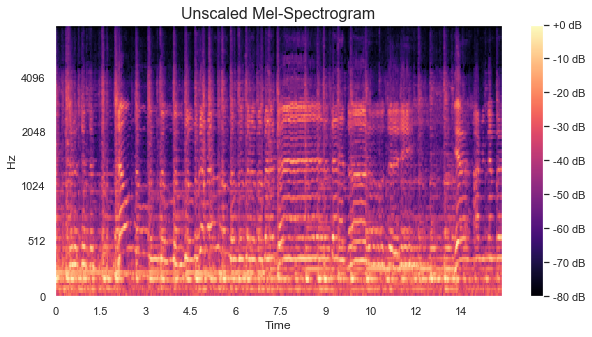

In [5]:
unscaled_spect = plot_spect(spects[25], title = 'Unscaled Mel-Spectrogram')
unscaled_spect.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/unscaled_spect.png')

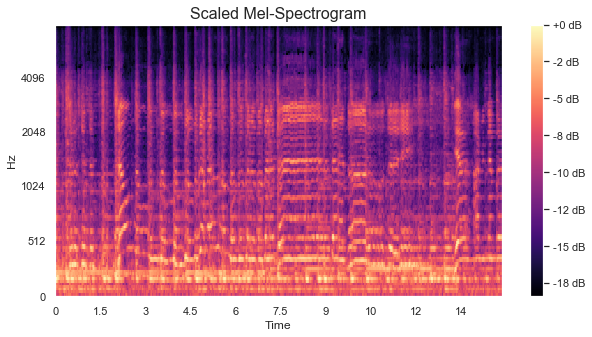

In [6]:
scaled_spect = plot_spect(scaled_spects[25], title = 'Scaled Mel-Spectrogram')
scaled_spect.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/scaled_spect.png')

In [7]:
genres_df = build_dataset.get_genres()
full_dataset = build_dataset.get_dataset()

In [14]:
genres_dict = dict(genres_df['title'])

In [15]:
included_genres = full_dataset['genre_top'].unique()
n_subgenres = genres_df['top_level'].value_counts()[included_genres]
included_mask  = [g in included_genres for g in genres_df['top_level']]

genres_filtered = genres_df.loc[included_mask,:]
order = genres_filtered['top_level'].value_counts().index
sorted_genre = [genres_dict[int(i)] for i in order]

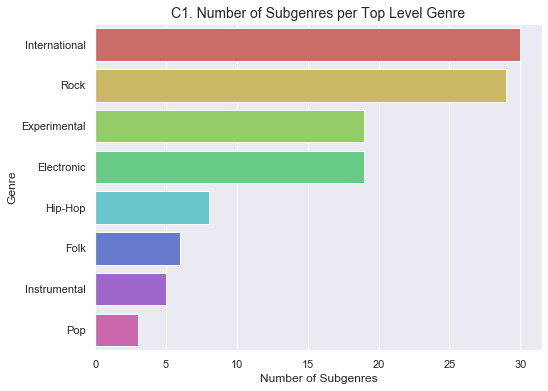

In [16]:
#Create side by side subplots
fig = plt.figure(figsize=(8,6))

#Count plot for the number of households 
c1 = sns.countplot(y = 'top_level', data = genres_filtered, order = order,
                   palette = 'hls', orient = 'v')
_ = c1.set(xlabel = 'Number of Subgenres', ylabel = 'Genre')
_ = c1.set_yticklabels(labels= sorted_genre)
_ = c1.set_title('C1. Number of Subgenres per Top Level Genre',fontsize=14)
_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c1.png')

In [17]:
included_tracks = build_dataset.get_dataset()
features = build_dataset.get_features()

In [18]:
features = features.loc[included_tracks.index,:]
experimental = included_tracks['genre_top'] == 38
hiphop = included_tracks['genre_top'] == 21
mfcc_features = features.loc[(experimental | hiphop ), 'mfcc']

In [19]:
y = included_tracks.loc[(experimental | hiphop ), 'genre_top']
y = LabelEncoder().fit_transform(y)

In [20]:
mfcc_features_pca = PCA(n_components=2).fit_transform(mfcc_features)

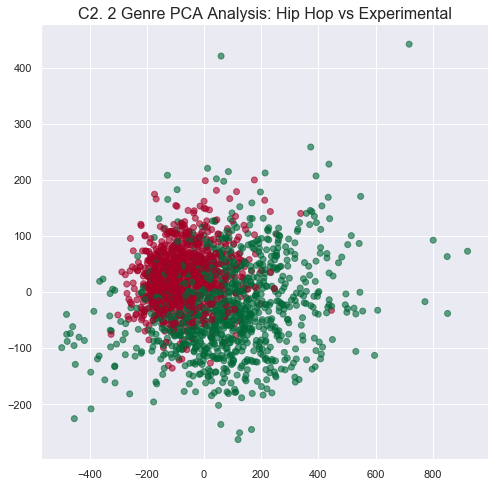

In [21]:
fig = plt.figure(figsize=(8,8))
_ = plt.scatter(mfcc_features_pca[:,0], mfcc_features_pca[:,1], c = y, alpha = 0.6, cmap = 'RdYlGn')
_ = plt.title('C2. 2 Genre PCA Analysis: Hip Hop vs Experimental', fontsize = 16)
_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c2.png')